Import Packages

In [1]:
# Import pandas for data handling
import pandas as pd

# NLTK is our Natural-Language-Took-Kit
import nltk
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

# Libraries for helping us with strings
import string
# Regular Expression Library
import re

# Import our text vectorizers
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer


# Import our classifiers
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier


# Import some ML helper function
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report



# Import our metrics to evaluate our model
from sklearn import metrics


# Library for plotting
import matplotlib.pyplot as plt
import seaborn as sns

# You may need to download these from nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
stopwords = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\yusse\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\yusse\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\yusse\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Import our Data

In [2]:
# Import our data
df = pd.read_csv('fake_or_real_news.csv')
print(df.shape)
df.head(20)

(6335, 4)


,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL
5,6903,"Tehran, USA","\r\nI’m not an immigrant, but my grandparent...",FAKE
6,7341,Girl Horrified At What She Watches Boyfriend D...,"Share This Baylee Luciani (left), Screenshot o...",FAKE
7,95,‘Britain’s Schindler’ Dies at 106,A Czech stockbroker who saved more than 650 Je...,REAL
8,4869,Fact check: Trump and Clinton at the 'commande...,Hillary Clinton and Donald Trump made some ina...,REAL
9,2909,Iran reportedly makes new push for uranium con...,Iranian negotiators reportedly have made a las...,REAL


Check the data

In [3]:
#no null values
print(df.isnull().sum())
#no dublicates
print(df.duplicated().sum())

df['label'].value_counts(normalize=True)


Unnamed: 0    0
title         0
text          0
label         0
dtype: int64
0


REAL    0.500552
FAKE    0.499448
Name: label, dtype: float64

Build a Text Pipeline

In [4]:
#removing unwanted characters

def remove_unwanted_char(a_string):    
    a_string = re.sub(r"(@\[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "", str(a_string))
    return a_string

remove_unwanted_char(df['title'])
print(df)

      Unnamed: 0                                              title  \
0           8476                       You Can Smell Hillary’s Fear   
1          10294  Watch The Exact Moment Paul Ryan Committed Pol...   
2           3608        Kerry to go to Paris in gesture of sympathy   
3          10142  Bernie supporters on Twitter erupt in anger ag...   
4            875   The Battle of New York: Why This Primary Matters   
...          ...                                                ...   
6330        4490  State Department says it can't find emails fro...   
6331        8062  The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...   
6332        8622  Anti-Trump Protesters Are Tools of the Oligarc...   
6333        4021  In Ethiopia, Obama seeks progress on peace, se...   
6334        4330  Jeb Bush Is Suddenly Attacking Trump. Here's W...   

                                                   text label  
0     Daniel Greenfield, a Shillman Journalism Fello...  FAKE  
1     Google Pinter

In [5]:
# Remove all punctuation

def remove_punctuation(a_string):    
    a_string = re.sub(r'[^\w\s]','', str(a_string))
    return a_string

remove_punctuation(df['title'])

'0                            You Can Smell Hillarys Fear\n1       Watch The Exact Moment Paul Ryan Committed Pol\n2             Kerry to go to Paris in gesture of sympathy\n3       Bernie supporters on Twitter erupt in anger ag\n4        The Battle of New York Why This Primary Matters\n                                                      \n6330    State Department says it cant find emails fro\n6331    The P in PBS Should Stand for Plutocratic \n6332    AntiTrump Protesters Are Tools of the Oligarc\n6333    In Ethiopia Obama seeks progress on peace se\n6334    Jeb Bush Is Suddenly Attacking Trump Heres W\nName title Length 6335 dtype object'

In [6]:
def make_lower(a_string):
    return a_string.lower()

# Remove all stopwords

def remove_stopwords(a_string):
    # Break the sentence down into a list of words
    words = word_tokenize(a_string)
    
    # Make a list to append valid words into
    valid_words = []
    
    # Loop through all the words
    for word in words:
        
        # Check if word is not in stopwords
        if word not in stopwords:
            
            # If word not in stopwords, append to our valid_words
            valid_words.append(word)

    # Join the list of words together into a string
    a_string = ' '.join(valid_words)

    return a_string
            
remove_stopwords(str(df['title']))

"0 You Can Smell Hillary ’ Fear 1 Watch The Exact Moment Paul Ryan Committed Pol ... 2 Kerry go Paris gesture sympathy 3 Bernie supporters Twitter erupt anger ag ... 4 The Battle New York : Why This Primary Matters ... 6330 State Department says ca n't find emails fro ... 6331 The ‘ P ’ PBS Should Stand ‘ Plutocratic ’ ... 6332 Anti-Trump Protesters Are Tools Oligarc ... 6333 In Ethiopia , Obama seeks progress peace , se ... 6334 Jeb Bush Is Suddenly Attacking Trump . Here 's W ... Name : title , Length : 6335 , dtype : object"

In [7]:
def text_pipeline(input_string):
    input_string = make_lower(input_string)
    input_string = remove_punctuation(input_string)
    #input_string = lem_with_pos_tag(input_string)
    input_string = remove_stopwords(input_string)    
    return input_string


df['article_clean'] = df['text']
df['article_clean'] = df['text'].apply(text_pipeline)

print("ORIGINAL TEXT:", df['article_clean'])
print("CLEANDED TEXT:", df['article_clean'])

ORIGINAL TEXT: 0       daniel greenfield shillman journalism fellow f...
1       google pinterest digg linkedin reddit stumbleu...
2       us secretary state john f kerry said monday st...
3       kaydee king kaydeeking november 9 2016 lesson ...
4       primary day new york frontrunners hillary clin...
                              ...                        
6330    state department told republican national comm...
6331    p pbs stand plutocratic pentagon posted oct 27...
6332    antitrump protesters tools oligarchy reform al...
6333    addis ababa ethiopia president obama convened ...
6334    jeb bush suddenly attacking trump heres matter...
Name: article_clean, Length: 6335, dtype: object
CLEANDED TEXT: 0       daniel greenfield shillman journalism fellow f...
1       google pinterest digg linkedin reddit stumbleu...
2       us secretary state john f kerry said monday st...
3       kaydee king kaydeeking november 9 2016 lesson ...
4       primary day new york frontrunners hillary c

Build the Vectorizer

In [8]:
# Define our `X` and `y` data. 

X = df['article_clean'].values

y = df['label'].values

In [9]:
# Split our data into testing and training like always. 
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)


# Save the raw text for later just incase
X_train_text = X_train
X_test_text = X_test

In [10]:
# Initialize our vectorizer
vectorizer = TfidfVectorizer()

# This makes your vocab matrix
vectorizer.fit(X_train)

# This transforms your documents into vectors.
X_train = vectorizer.transform(X_train)
X_test = vectorizer.transform(X_test)

print(X_train.shape, type(X))

(5068, 79241) <class 'numpy.ndarray'>


In [11]:
title_clean = vectorizer.get_feature_names()
label = vectorizer.idf_

print(len(title_clean), len(label))

df_idf = pd.DataFrame.from_dict( {'article_clean': title_clean, 'label': label})

df_idf = df_idf.sort_values(by='label', ascending=False)

df_idf

79241 79241


,article_clean,label
64771,singapores,8.837752
63506,sequencing,8.837752
63512,sequestrations,8.837752
44231,matilda,8.837752
63511,sequestrationrelief,8.837752
...,...,...
52918,people,1.624720
6151,also,1.582514
77742,would,1.538292
61630,said,1.509971


Build the Model

In [12]:
#Yussef 
#Initialize and train the model. Here we are using the MultinomialNB model.

model = MultinomialNB(alpha=.05)

model.fit(X_train, y_train)

MultinomialNB(alpha=0.05)

Model Evaluation

In [13]:
#Model evaluation
y_pred = model.predict(X_test)

accuracy = model.score(X_test, y_test)

print("Model Accuracy: %f" % accuracy)

Model Accuracy: 0.902920


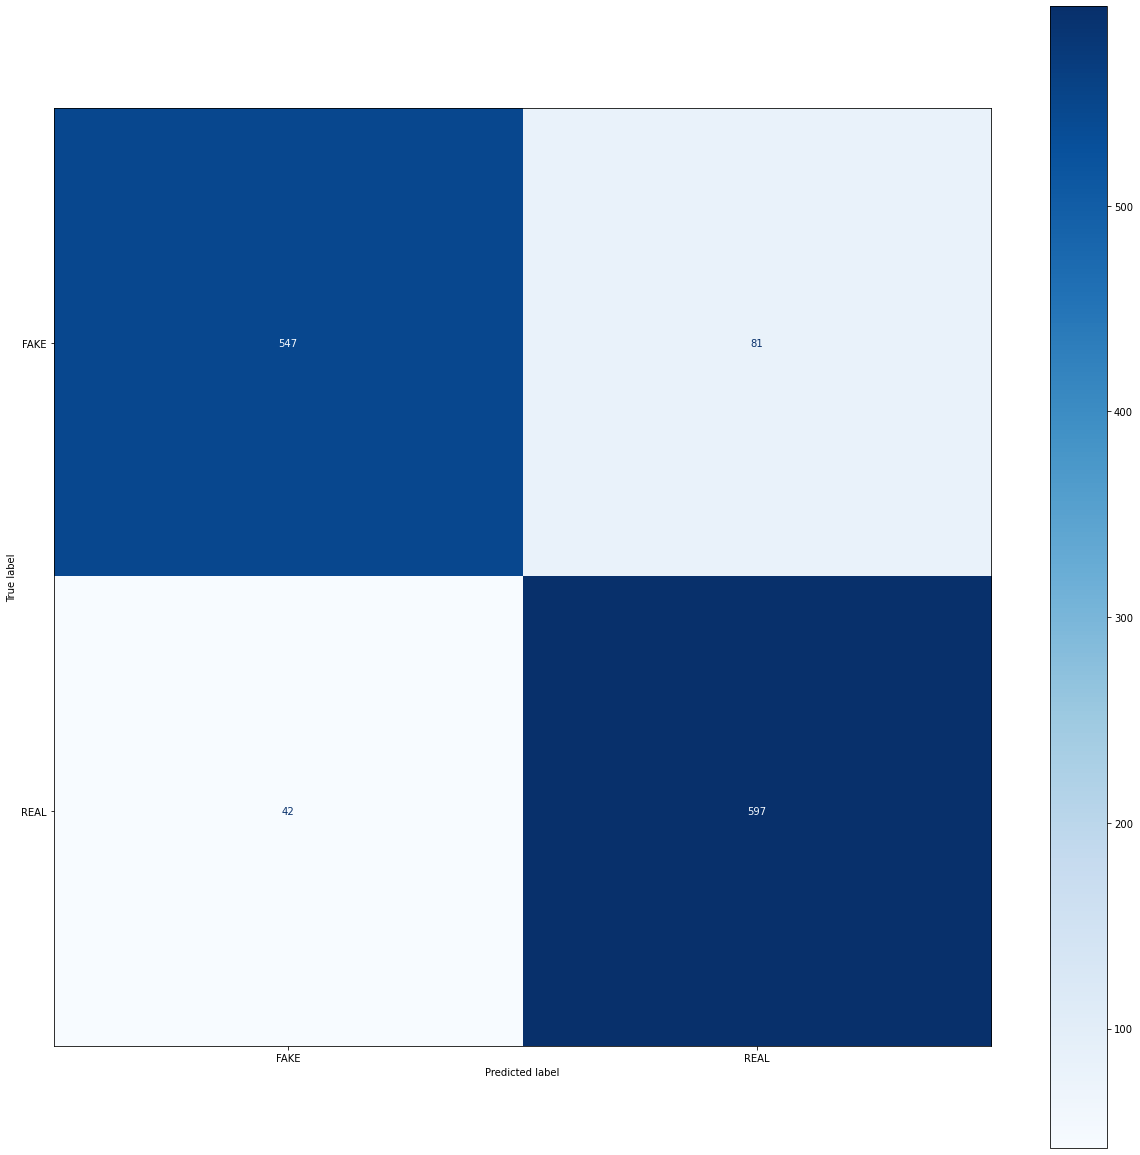

In [14]:
#Confusion Matrix
fig, ax = plt.subplots(figsize=(21, 21))

disp = plot_confusion_matrix(model, X_test, y_test,
                             display_labels=model.classes_,
                             cmap=plt.cm.Blues, ax=ax)

In [15]:
#Classification Report
print(classification_report(y_test, y_pred, target_names=model.classes_))

              precision    recall  f1-score   support

        FAKE       0.93      0.87      0.90       628
        REAL       0.88      0.93      0.91       639

    accuracy                           0.90      1267
   macro avg       0.90      0.90      0.90      1267
weighted avg       0.90      0.90      0.90      1267

